<a href="https://colab.research.google.com/github/kazimovmirkazim/Deep-learning/blob/main/Trainingdeep_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

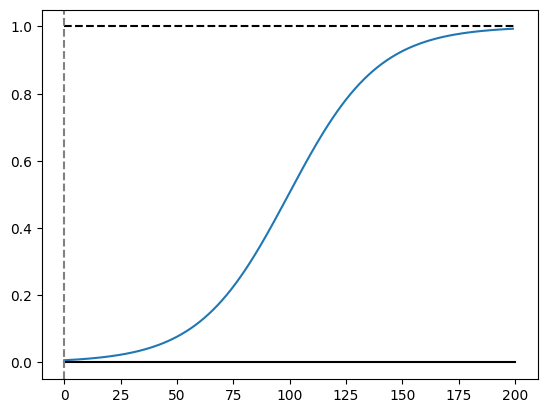

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(Z):
  return 1 / (1 + np.exp(-Z))

z = np.linspace(-5, 5, 200)

plt.plot(sigmoid(z))
plt.plot([0, 200], [0, 0], 'k-')
plt.plot([0, 200], [1, 1], 'k--')
plt.axvline(x=0, color='gray', linestyle='--') # Added a vertical line at x=0
plt.show() # Added show to display the plot

In [9]:
import tensorflow as tf
dense = tf.keras.layers.Dense (50,activation='relu',kernel_initializer='he_normal')

In [10]:
import tensorflow as tf

In [11]:
he_avg_init = tf.keras.initializers.VarianceScaling(scale=2.,mode='fan_avg',distribution='uniform')
dense  = tf.keras.layers.Dense(50,activation='sigmoid',kernel_initializer=he_avg_init)

Nonsaturating Activation Funkctions

In [12]:
def lucky_relu(z,alpha):
  return np.maximum(alpha *  z,z)

z= np.linspace(-5,5,200)


In [13]:
leaky_relu  = tf.keras.layers.LeakyReLU(negative_slope=0.2)
dense = tf.keras.layers.Dense(50,activation=leaky_relu,
                              kernel_initializer='he_normal')

In [14]:
model = tf.keras.models.Sequential( [
    tf.keras.layers.Dense(50,kernel_initializer='he_normal'),
    tf.keras.layers.LeakyReLU(negative_slope=0.2),
])

In [15]:
dense =  tf.keras.layers.Dense(50,activation='elu',
                              kernel_initializer='he_normal')

In [16]:
dense =  tf.keras.layers.Dense(50,activation='selu',
                              kernel_initializer='he_normal')

In [26]:
tf.random.set_seed(42)
model =  tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
for layer in range(100):
  model.add(tf.keras.layers.Dense(100,activation='selu',
                                  kernel_initializer='lecun_normal'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer= tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics= ['accuracy'])

In [28]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist
X_train,y_train= X_train_full[:-5000],y_train_full[:-5000]
X_valid,y_valid= X_train_full[-5000:],y_train_full[-5000:] # Corrected slicing for validation set
X_train,X_valid,X_test = X_train/255.0,X_valid/255.0,X_test/255.0 # Corrected variable name X_test to x_test

In [29]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [30]:
pixel_means=X_train.mean(axis=0,keepdims=True)
pixel_stds=X_train.std(axis=0,keepdims=True)
X_train_scaled=(X_train-pixel_means)/pixel_stds
X_valid_scaled=(X_valid-pixel_means)/pixel_stds
X_test_scaled=(X_test-pixel_means)/pixel_stds

In [31]:
history = model.fit (X_train,y_train,epochs=5,validation_data=(X_valid,y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - accuracy: 0.3294 - loss: 1.7519 - val_accuracy: 0.6636 - val_loss: 0.8394
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.6910 - loss: 0.8077 - val_accuracy: 0.7628 - val_loss: 0.6369
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.7638 - loss: 0.6344 - val_accuracy: 0.7678 - val_loss: 0.6633
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.7877 - loss: 0.5959 - val_accuracy: 0.7944 - val_loss: 0.5589
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.8068 - loss: 0.5424 - val_accuracy: 0.8182 - val_loss: 0.5101


In [32]:
def swish(z,beta=1):
  return z * sigmoid(beta * z)
def approx_gelu(z):
  return swish(z,beta=1.702)
def softplus(z):
  return np.log(1+ np.exp(z))
def mish(z):
  return z * np.tanh(softplus(z))

# Batch Normalization

In [33]:
model =  tf.keras.Sequential(
    [

     tf.keras.layers.Flatten(input_shape= [28,28]),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Dense(300,activation='relu',
                           kernel_initializer='he_normal'),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Dense(100,activation='relu',
                           kernel_initializer='he_normal'),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Dense(10,activation='softmax')
     ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
[(var.name,var.trainable)for var in model.layers[1].variables]

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

In [35]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=2,validation_data=(X_valid,y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7549 - loss: 0.7203 - val_accuracy: 0.8528 - val_loss: 0.3945
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8566 - loss: 0.4033 - val_accuracy: 0.8666 - val_loss: 0.3613


In [36]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

Data functiona chatmazdan once normalize olmalidi,

Batch Normalization Computer vision uchun chox yaxshidi


---



In [39]:
model =  tf.keras.Sequential(
    [

     tf.keras.layers.Flatten(input_shape= [28,28]),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Dense(300,activation='relu',
                           kernel_initializer='he_normal',use_bias=False),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Dense(100,activation='relu',
                           kernel_initializer='he_normal',use_bias=False),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Dense(10,activation='softmax')
     ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',
              metrics=['accuracy'])
model.fit(X_train,y_train,epochs=2,validation_data=(X_valid,y_valid))

Epoch 1/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.7529 - loss: 0.7094 - val_accuracy: 0.8508 - val_loss: 0.3924
Epoch 2/2
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8565 - loss: 0.4046 - val_accuracy: 0.8650 - val_loss: 0.3602


# Gradient Clipping for RNN



In [41]:
optimizer =  tf.keras.optimizers.SGD(clipvalue=1.0)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer)

In [42]:
optimizer =  tf.keras.optimizers.SGD(clipnorm=1.0)
model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer)

Reusing Pretrained


In [59]:
from types import new_class
pos_class_id = class_names.index("Pullover")
neg_class_id = class_names.index("T-shirt/top")

def split_dataset(X,y):
  y_for_B = (y== pos_class_id) | (y==neg_class_id)
  y_A=  y[~y_for_B]
  y_B= (y[y_for_B]== pos_class_id) # Removed .astype(np.float32)
  old_class_ids = list(set(range(10)) - set([neg_class_id,pos_class_id]))
  for old_class_id,new_class_id in zip(old_class_ids,range(8)):
    y_A[y_A== old_class_id] =  new_class_id
  return ((X[~y_for_B],y_A),(X[y_for_B],y_B))

(X_train_A,y_train_A),(X_train_B,y_train_B) = split_dataset(X_train,y_train)
(X_valid_A,y_valid_A),(X_valid_B,y_valid_B) = split_dataset(X_valid,y_valid)
(X_test_A,y_test_A),(X_test_B,y_test_B) = split_dataset(X_test,y_test)
X_train_B= X_train_B[:200]
y_train_B= y_train_B[:200]

In [53]:
tf.random.set_seed(42)

model_A = tf.keras.Sequential(
   [

     tf.keras.layers.Flatten(input_shape= [28,28]),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Dense(100,activation='relu',
                           kernel_initializer='he_normal'),
     tf.keras.layers.Dense(100,activation='relu',
                           kernel_initializer='he_normal'),
     tf.keras.layers.Dense(100,activation='relu',kernel_initializer='he_normal'),
     tf.keras.layers.Dense(8,activation='softmax')
     ]
)
model_A.compile(loss='sparse_categorical_crossentropy',
                optimizer= tf.keras.optimizers.SGD(learning_rate=1e-3),
                metrics=['accuracy'])
history = model_A.fit(X_train_A,y_train_A,epochs=20,
                      validation_data=(X_valid_A,y_valid_A))
model_A.save('my_model_A.keras')

Epoch 1/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6033 - loss: 1.1995 - val_accuracy: 0.8305 - val_loss: 0.4793
Epoch 2/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8302 - loss: 0.4809 - val_accuracy: 0.8571 - val_loss: 0.3890
Epoch 3/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8565 - loss: 0.3993 - val_accuracy: 0.8754 - val_loss: 0.3506
Epoch 4/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8712 - loss: 0.3594 - val_accuracy: 0.8834 - val_loss: 0.3281
Epoch 5/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8815 - loss: 0.3343 - val_accuracy: 0.8897 - val_loss: 0.3132
Epoch 6/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8882 - loss: 0.3163 - val_accuracy: 0.8940 - val_loss: 0.3021
Epoch 7/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8935 - loss: 0.3022 - val_accuracy: 0.8990 - val_loss: 0.2935
Epoch 8/20
1376/1376 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8975 - loss: 0.2907 

In [52]:
tf.random.set_seed(42)

model_B = tf.keras.Sequential(
   [

     tf.keras.layers.Flatten(input_shape= [28,28]),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.Dense(100,activation='relu',
                           kernel_initializer='he_normal'),
     tf.keras.layers.Dense(100,activation='relu',
                           kernel_initializer='he_normal'),
     tf.keras.layers.Dense(100,activation='relu',kernel_initializer='he_normal'),
     tf.keras.layers.Dense(1,activation='sigmoid')
     ]
)
model_B.compile(loss='binary_crossentropy',
                optimizer= tf.keras.optimizers.SGD(learning_rate=1e-3),
                metrics=['accuracy'])
history = model_B.fit(X_train_B,y_train_B,epochs=20,
                      validation_data=(X_valid_B,y_valid_B))
model.evaluate(X_test_B,y_test_B)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.5425 - loss: 0.7230 - val_accuracy: 0.2601 - val_loss: 0.8095
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6157 - loss: 0.6561 - val_accuracy: 0.3136 - val_loss: 0.7692
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7227 - loss: 0.6007 - val_accuracy: 0.4055 - val_loss: 0.7324
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7623 - loss: 0.5542 - val_accuracy: 0.4985 - val_loss: 0.6991
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8007 - loss: 0.5147 - val_accuracy: 0.5955 - val_loss: 0.6688
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8566 - loss: 0.4812 - val_accuracy: 0.6825 - val_loss: 0.6412
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8654 - loss: 0.4522 - val_accuracy: 0.7468 - val_loss: 0.6159
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8922 - loss: 0.4269 - val_accuracy: 0.7992 - val_loss: 0.5930


[3.71354341506958, 0.40700000524520874]

In [60]:
tf.random.set_seed(42)

In [61]:
model_A_clone =  tf.keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())    # A modelinin clonunu gotururuk ki,B_on_A-i yeniden fit etsek,A-nin parametrleri


In [64]:
model_B_on_A = tf.keras.Sequential(model_A_clone.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [65]:
for layer in model_B_on_A.layers[:-1]:
  layer.trainable = False                               #bele edirik ki, A modelinin parametrleri deyismhmesin
optimizer= tf.keras.optimizers.SGD(learning_rate=1e-3)
model_B_on_A.compile(loss='binary_crossentropy',optimizer=optimizer,
                     metrics=['accuracy'])

history = model_B_on_A.fit(X_train_B,y_train_B,epochs=4,
                           validation_data=(X_valid_B,y_valid_B))

Epoch 1/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.5680 - loss: 0.9723 - val_accuracy: 0.4955 - val_loss: 0.9711
Epoch 2/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5434 - loss: 0.8559 - val_accuracy: 0.4718 - val_loss: 0.8830
Epoch 3/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4986 - loss: 0.7870 - val_accuracy: 0.4629 - val_loss: 0.8288
Epoch 4/4
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4899 - loss: 0.7447 - val_accuracy: 0.4471 - val_loss: 0.7916


In [66]:
for layer in model_B_on_A.layers[:-1]:
  layer.trainable = True                          #bele edirik ki, A modelinin parametrleri deyismhmesin
optimizer= tf.keras.optimizers.SGD(learning_rate=1e-3)
model_B_on_A.compile(loss='binary_crossentropy',optimizer=optimizer,
                     metrics=['accuracy'])

history = model_B_on_A.fit(X_train_B,y_train_B,epochs=16,
                           validation_data=(X_valid_B,y_valid_B))

Epoch 1/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.5290 - loss: 0.8008 - val_accuracy: 0.4787 - val_loss: 0.7428
Epoch 2/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5595 - loss: 0.7407 - val_accuracy: 0.5420 - val_loss: 0.6992
Epoch 3/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5693 - loss: 0.6901 - val_accuracy: 0.5925 - val_loss: 0.6602
Epoch 4/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6494 - loss: 0.6459 - val_accuracy: 0.6459 - val_loss: 0.6246
Epoch 5/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7365 - loss: 0.6066 - val_accuracy: 0.6815 - val_loss: 0.5922
Epoch 6/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7831 - loss: 0.5713 - val_accuracy: 0.7329 - val_loss: 0.5628
Epoch 7/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8085 - loss: 0.5395 - val_accuracy: 0.7745 - val_loss: 0.5361
Epoch 8/16
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8499 - loss: 0.5105 - val_accuracy: 0.8042 - val_loss: 0.5118
